In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive # Import the drive function from google.colab
drive.mount('/content/drive')

# Membaca dataset
# Path ke folder dataset di Google Drive
dataset_path = '/content/drive/MyDrive/BDDM/heart.csv'

# Load the dataset using pandas. Assuming it's a CSV file
dataset = pd.read_csv(dataset_path)  # Corrected line: Removed the extra path


# Informasi awal dataset
print("First 5 rows of the dataset:")
print(dataset.head()) # Changed 'data' to 'dataset'
print("\nDataset Information:")
print(dataset.info()) # Changed 'data' to 'dataset'
print("\nSummary Statistics:")
print(dataset.describe()) # Changed 'data' to 'dataset'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303

In [ ]:
# Memastikan tidak ada nilai kosong
print("Jumlah nilai kosong per kolom:")
print(dataset.isnull().sum())

# Memisahkan fitur dan target
X = dataset.drop('target', axis=1)
y = dataset['target']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Jumlah nilai kosong per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


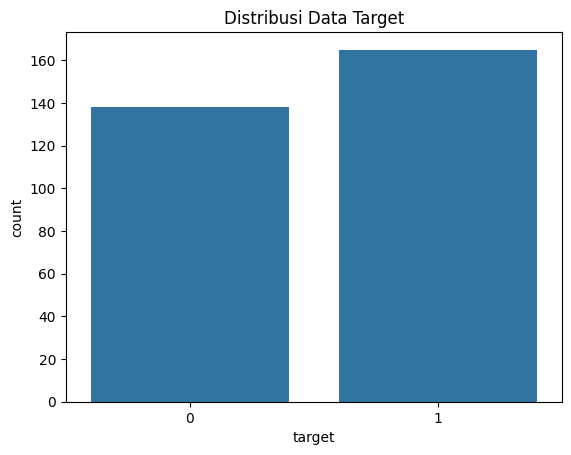

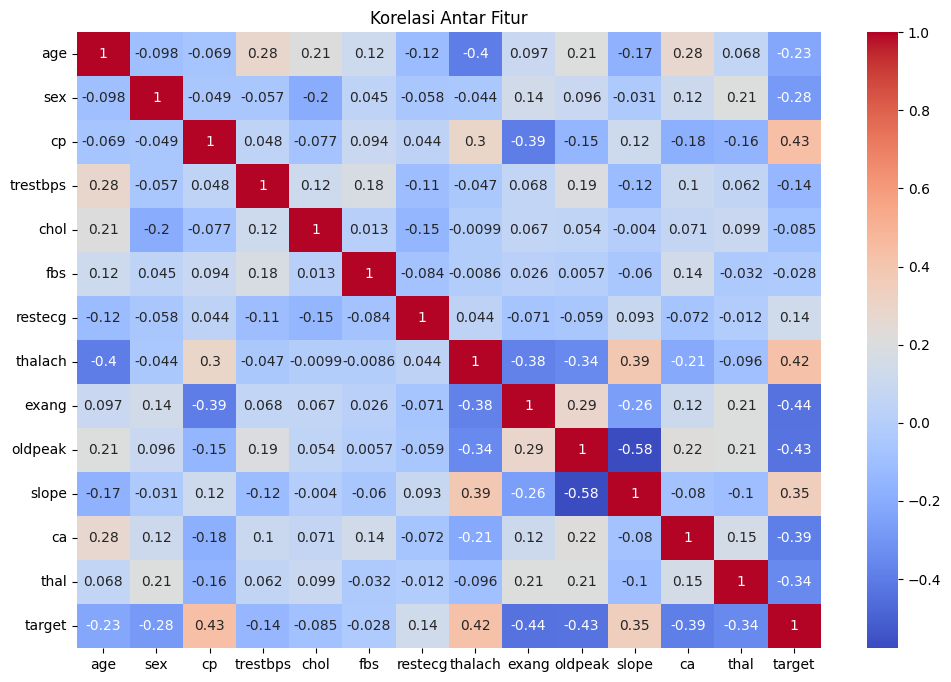

In [ ]:
# Distribusi target
sns.countplot(x='target', data=dataset)
plt.title('Distribusi Data Target')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()


In [ ]:
# Menggunakan Random Forest untuk menghitung pentingnya fitur
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train_scaled, y_train)

# Menampilkan fitur penting
feature_importances = rf_temp.feature_importances_
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Fitur paling penting:")
print(important_features)


Fitur paling penting:
     Feature  Importance
9    oldpeak    0.128485
7    thalach    0.119725
11        ca    0.115533
2         cp    0.103792
12      thal    0.093300
0        age    0.092811
3   trestbps    0.077537
8      exang    0.075809
4       chol    0.074812
10     slope    0.051058
1        sex    0.035658
6    restecg    0.019782
5        fbs    0.011698


In [ ]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = rf_model.predict(X_test_scaled)


In [ ]:
# Evaluasi performa model
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Akurasi Model: 0.84
